In [1]:
#Step 3: Sentiment Analysis

#Apply NLP sentiment models to classify each feedback.
#Options:

#VADER (quick, rule-based)

#TextBlob (basic polarity)

#Transformers (BERT / DistilBERT) → most impressive

#📌 Deliverable: Dataset with new column → sentiment_label (Positive / Neutral / Negative)

In [2]:
from google.colab import files
import pandas as pd

# Upload file
uploaded = files.upload()

# Load the correct Excel file
df = pd.read_excel("customer_feedback_cleaned.xlsx")

# Show first few rows
df.head()


Saving customer_feedback_cleaned.xlsx to customer_feedback_cleaned.xlsx


,customerID,gender,SeniorCitizen,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,CustomerFeedback,CleanedFeedback,feedback_char_len,feedback_word_count,clean_word_count,Region,State,tenure_filled,numAdminTickets_filled,numTechTickets_filled
0,7590-VHVEG,Female,0,No,1,No,No phone service,DSL,No,Yes,...,I have been using the DSL internet service fro...,using dsl internet past month far satisfied co...,401,68,26,North,New York,1,0,0
1,5575-GNVDE,NaN,0,No,34,Yes,No,DSL,Yes,No,...,I have been a customer with this company for o...,two half years satisfied dsl internet reliable...,399,73,24,West,California,34,0,0
2,3668-QPYBK,Male,0,No,2,Yes,No,DSL,Yes,Yes,...,I recently signed up for DSL internet service ...,recently signed dsl internet two months ago mo...,482,77,36,East,Illinois,2,0,0
3,7795-CFOCW,Male,0,No,45,No,No phone service,DSL,Yes,No,...,I have been a loyal customer with this company...,loyal months satisfied provide monthly charges...,406,72,25,West,Illinois,45,0,3
4,9305-CDSKC,Female,0,No,8,Yes,Yes,Fiber optic,No,No,...,"""I recently decided to churn from this interne...",recently decided churn internet months monthly...,426,70,27,South,California,8,0,0


In [3]:
df.columns


Index(['customerID', 'gender', 'SeniorCitizen', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'numAdminTickets', 'numTechTickets', 'Location', 'CustomerFeedback',
       'CleanedFeedback', 'feedback_char_len', 'feedback_word_count',
       'clean_word_count', 'Region', 'State', 'tenure_filled',
       'numAdminTickets_filled', 'numTechTickets_filled'],
      dtype='object')

In [4]:
df.columns.tolist()


['customerID',
 'gender',
 'SeniorCitizen',
 'Dependents',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'numAdminTickets',
 'numTechTickets',
 'Location',
 'CustomerFeedback',
 'CleanedFeedback',
 'feedback_char_len',
 'feedback_word_count',
 'clean_word_count',
 'Region',
 'State',
 'tenure_filled',
 'numAdminTickets_filled',
 'numTechTickets_filled']

In [5]:
!pip install vaderSentiment

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import pandas as pd

# Initialize VADER
analyzer = SentimentIntensityAnalyzer()

# Function to get sentiment
def get_vader_sentiment(text):
    score = analyzer.polarity_scores(str(text))['compound']
    if score >= 0.05:
        return "Positive"
    elif score <= -0.05:
        return "Negative"
    else:
        return "Neutral"

# Apply sentiment on the correct column
df["sentiment_vader"] = df["CleanedFeedback"].apply(get_vader_sentiment)

# Preview results
df[["CleanedFeedback", "sentiment_vader"]].head()


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 4.8 MB/s eta 0:00:00


,CleanedFeedback,sentiment_vader
0,using dsl internet past month far satisfied co...,Positive
1,two half years satisfied dsl internet reliable...,Neutral
2,recently signed dsl internet two months ago mo...,Negative
3,loyal months satisfied provide monthly charges...,Positive
4,recently decided churn internet months monthly...,Positive


In [6]:
!pip install textblob  #TextBlob is a Python tool that helps you understand sentiment in text—whether someone is feeling positive, negative, or neutral.

from textblob import TextBlob

def get_textblob_sentiment(text):
    analysis = TextBlob(str(text))
    polarity = analysis.sentiment.polarity
    if polarity > 0:
        return "Positive"
    elif polarity < 0:
        return "Negative"
    else:
        return "Neutral"

df["sentiment_textblob"] = df["CleanedFeedback"].apply(get_textblob_sentiment)

df[["CleanedFeedback", "sentiment_vader", "sentiment_textblob"]].head()


,CleanedFeedback,sentiment_vader,sentiment_textblob
0,using dsl internet past month far satisfied co...,Positive,Positive
1,two half years satisfied dsl internet reliable...,Neutral,Positive
2,recently signed dsl internet two months ago mo...,Negative,Negative
3,loyal months satisfied provide monthly charges...,Positive,Positive
4,recently decided churn internet months monthly...,Positive,Positive


In [7]:
!pip install transformers
from transformers import pipeline

# Load pre-trained sentiment model
sentiment_pipeline = pipeline("sentiment-analysis")

# Apply to dataset (on first 200 rows for speed, then expand)
df["sentiment_bert"] = df["CleanedFeedback"].astype(str).apply(lambda x: sentiment_pipeline(x[:512])[0]['label'])

df[["CleanedFeedback", "sentiment_bert"]].head()


No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

Device set to use cuda:0
You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset


,CleanedFeedback,sentiment_bert
0,using dsl internet past month far satisfied co...,NEGATIVE
1,two half years satisfied dsl internet reliable...,NEGATIVE
2,recently signed dsl internet two months ago mo...,NEGATIVE
3,loyal months satisfied provide monthly charges...,NEGATIVE
4,recently decided churn internet months monthly...,NEGATIVE


In [8]:
df["sentiment_vader"].value_counts()
df["sentiment_textblob"].value_counts()
df["sentiment_bert"].value_counts()


,count
sentiment_bert,
NEGATIVE,5074
POSITIVE,1661


In [9]:
df.to_excel("customer_feedback_with_sentiment.xlsx", index=False)


In [10]:
from google.colab import files
files.download("customer_feedback_with_sentiment.xlsx")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [11]:
#Next step: Topic Modeling (Key Insight Part)

#Extract main topics from feedback.
#Methods:

#LDA (Latent Dirichlet Allocation) → classic

#BERTopic → modern, more accurate

#KMeans clustering with TF-IDF

#📌 Deliverable: List of topics (e.g., Billing Issues, Network Quality, Customer Support).
#Sentiment analysis shows how customers feel; topic modeling reveals what they’re talking about. Together, they help you find real issues—like billing or support—without reading every comment.

In [12]:
import pandas as pd

# Load dataset
df = pd.read_excel("customer_feedback_cleaned.xlsx")

# Check first rows
print(df.head())

# Check column names
print(df.columns)


   customerID  gender  SeniorCitizen Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0         No       1           No   
1  5575-GNVDE     NaN              0         No      34          Yes   
2  3668-QPYBK    Male              0         No       2          Yes   
3  7795-CFOCW    Male              0         No      45           No   
4  9305-CDSKC  Female              0         No       8          Yes   

      MultipleLines InternetService OnlineSecurity OnlineBackup  ...  \
0  No phone service             DSL             No          Yes  ...   
1                No             DSL            Yes           No  ...   
2                No             DSL            Yes          Yes  ...   
3  No phone service             DSL            Yes           No  ...   
4               Yes     Fiber optic             No           No  ...   

                                    CustomerFeedback  \
0  I have been using the DSL internet service fro...   
1  I have been a custo

In [13]:
import pandas as pd

# Load dataset
df = pd.read_excel("customer_feedback_cleaned.xlsx")

# Extract feedback column
texts = df["CleanedFeedback"].astype(str).tolist()


In [14]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# Vectorize
vectorizer = CountVectorizer(stop_words="english", max_df=0.95, min_df=2)
X = vectorizer.fit_transform(texts)

# Train LDA
lda = LatentDirichletAllocation(n_components=5, random_state=42)  # 5 topics
lda.fit(X)

# Show top words for each topic
words = vectorizer.get_feature_names_out()
for idx, topic in enumerate(lda.components_):
    print(f"\nTopic {idx+1}:")
    print([words[i] for i in topic.argsort()[-10:]])



Topic 1:
['card', 'credit', 'issues', 'reasonable', 'payment', 'charges', 'satisfied', 'overall', 'monthly', 'automatic']

Topic 2:
['charges', 'overall', 'recently', 'better', 'monthly', 'ultimately', 'optic', 'fiber', 'decided', 'month']

Topic 3:
['overall', 'recommend', 'charges', 'satisfied', 'monthly', 'fast', 'reliable', 'quality', 'optic', 'fiber']

Topic 4:
['different', 'reasonable', 'overall', 'check', 'charges', 'recently', 'monthly', 'payment', 'decided', 'month']

Topic 5:
['months', 'issues', 'reasonable', 'appreciate', 'charges', 'check', 'monthly', 'satisfied', 'month', 'overall']


In [15]:
!pip install bertopic

from bertopic import BERTopic

# Train BERTopic
topic_model = BERTopic(language="english")
topics, probs = topic_model.fit_transform(texts)

# Save topics into dataframe
df["Topic_BERTopic"] = topics

# View discovered topics
print(topic_model.get_topic_info().head())


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.0/153.0 kB 6.1 MB/s eta 0:00:00


/usr/local/lib/python3.12/dist-packages/hdbscan/plots.py:448: SyntaxWarning: invalid escape sequence '\l'
  axis.set_ylabel('$\lambda$ value')
/usr/local/lib/python3.12/dist-packages/hdbscan/robust_single_linkage_.py:175: SyntaxWarning: invalid escape sequence '\{'
  $max \{ core_k(a), core_k(b), 1/\alpha d(a,b) \}$.


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

   Topic  Count                                        Name  \
0     -1   1636  -1_appreciate_satisfied_reasonable_overall   
1      0   1149         0_decided_ultimately_recently_found   
2      1    179         1_different_decided_recently_faster   
3      2    134               2_bank_transfers_dsl_transfer   
4      3    130              3_transfer_bank_extremely_free   

                                      Representation  \
0  [appreciate, satisfied, reasonable, overall, i...   
1  [decided, ultimately, recently, found, better,...   
2  [different, decided, recently, faster, unrelia...   
3  [bank, transfers, dsl, transfer, years, automa...   
4  [transfer, bank, extremely, free, hassle, high...   

                                 Representative_Docs  
0  [loyal years happy fiber optic internet reliab...  
1  [recently canceled months month month contract...  
2  [recently cancelled internet months monthly ch...  
3  [years satisfied dsl internet reliable monthly...  
4  [month

In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

# Vectorize with TF-IDF
vectorizer = TfidfVectorizer(stop_words="english")
X = vectorizer.fit_transform(texts)

# Apply KMeans
kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)
kmeans.fit(X)

# Assign cluster labels
df["Topic_KMeans"] = kmeans.labels_

# Show top terms per cluster
terms = vectorizer.get_feature_names_out()
for i in range(5):  # 5 clusters
    cluster_terms = [terms[ind] for ind in kmeans.cluster_centers_[i].argsort()[-10:]]
    print(f"\nCluster {i}: {cluster_terms}")



Cluster 0: ['contract', 'cancel', 'payment', 'switch', 'better', 'internet', 'ultimately', 'recently', 'month', 'decided']

Cluster 1: ['years', 'hassle', 'internet', 'method', 'bank', 'makes', 'payment', 'convenient', 'transfer', 'automatic']

Cluster 2: ['fast', 'fiber', 'optic', 'quality', 'reliable', 'paying', 'check', 'appreciate', 'convenience', 'electronic']

Cluster 3: ['issues', 'option', 'satisfied', 'internet', 'overall', 'appreciate', 'pay', 'check', 'mailed', 'month']

Cluster 4: ['reasonable', 'issues', 'dsl', 'internet', 'appreciate', 'card', 'credit', 'payments', 'automatic', 'convenience']


In [17]:
df.to_excel("customer_feedback_with_topics.xlsx", index=False)
print("✅ Topics added and saved to Excel")


✅ Topics added and saved to Excel


In [18]:
print(df.columns)


Index(['customerID', 'gender', 'SeniorCitizen', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'numAdminTickets', 'numTechTickets', 'Location', 'CustomerFeedback',
       'CleanedFeedback', 'feedback_char_len', 'feedback_word_count',
       'clean_word_count', 'Region', 'State', 'tenure_filled',
       'numAdminTickets_filled', 'numTechTickets_filled', 'Topic_BERTopic',
       'Topic_KMeans'],
      dtype='object')


In [19]:
print(df.columns)
# look for 'sentiment', 'sentiment_label', or 'polarity'


Index(['customerID', 'gender', 'SeniorCitizen', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'numAdminTickets', 'numTechTickets', 'Location', 'CustomerFeedback',
       'CleanedFeedback', 'feedback_char_len', 'feedback_word_count',
       'clean_word_count', 'Region', 'State', 'tenure_filled',
       'numAdminTickets_filled', 'numTechTickets_filled', 'Topic_BERTopic',
       'Topic_KMeans'],
      dtype='object')


In [20]:
!pip install nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk

# Download VADER lexicon (only once)
nltk.download("vader_lexicon")

# Initialize analyzer
sia = SentimentIntensityAnalyzer()

# Apply sentiment scoring
df["sentiment_score"] = df["CleanedFeedback"].apply(lambda x: sia.polarity_scores(str(x))["compound"])

# Convert score → label
df["sentiment_label"] = df["sentiment_score"].apply(
    lambda x: "Positive" if x > 0.05 else ("Negative" if x < -0.05 else "Neutral")
)


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


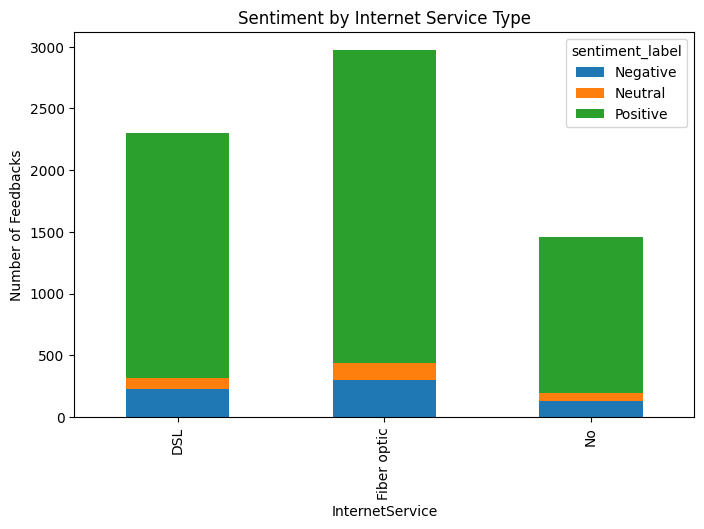

In [21]:
import matplotlib.pyplot as plt

# Group by Internet Service type
sentiment_by_internet = df.groupby(["InternetService", "sentiment_label"]).size().unstack().fillna(0)

# Plot
sentiment_by_internet.plot(kind="bar", stacked=True, figsize=(8,5))
plt.title("Sentiment by Internet Service Type")
plt.ylabel("Number of Feedbacks")
plt.show()


In [22]:
#(Segmentation Expansion)

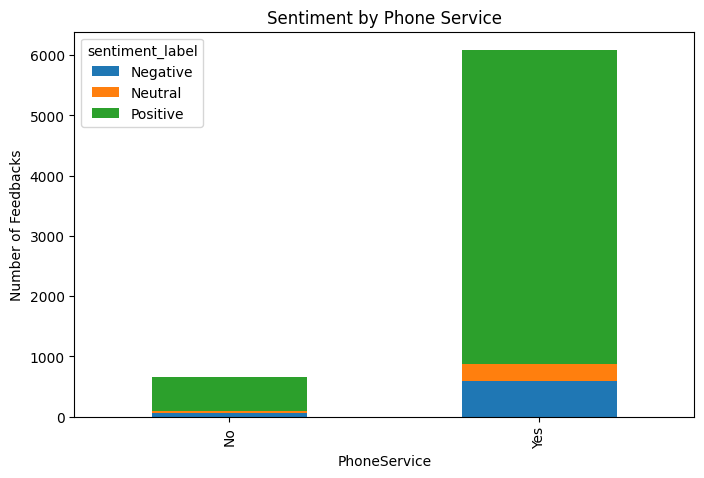

In [23]:
#For PhoneService
sentiment_by_phone = df.groupby(["PhoneService", "sentiment_label"]).size().unstack().fillna(0)
sentiment_by_phone.plot(kind="bar", stacked=True, figsize=(8,5))
plt.title("Sentiment by Phone Service")
plt.ylabel("Number of Feedbacks")
plt.show()


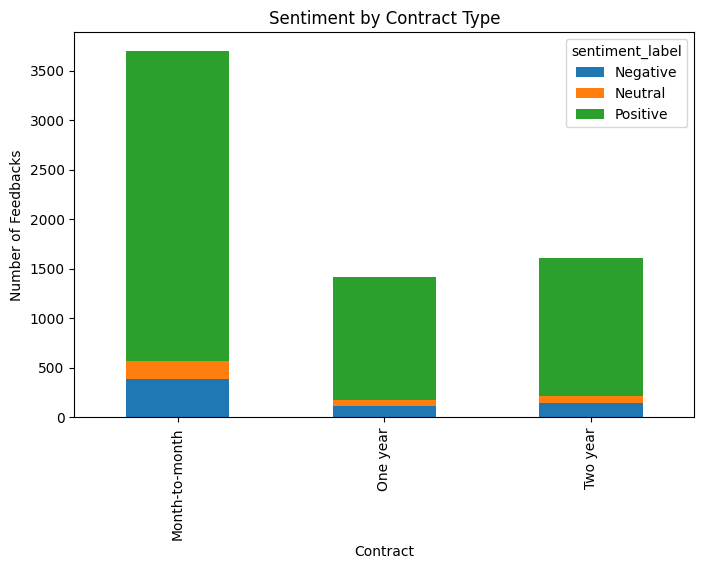

In [24]:
#For Contract
sentiment_by_contract = df.groupby(["Contract", "sentiment_label"]).size().unstack().fillna(0)
sentiment_by_contract.plot(kind="bar", stacked=True, figsize=(8,5))
plt.title("Sentiment by Contract Type")
plt.ylabel("Number of Feedbacks")
plt.show()


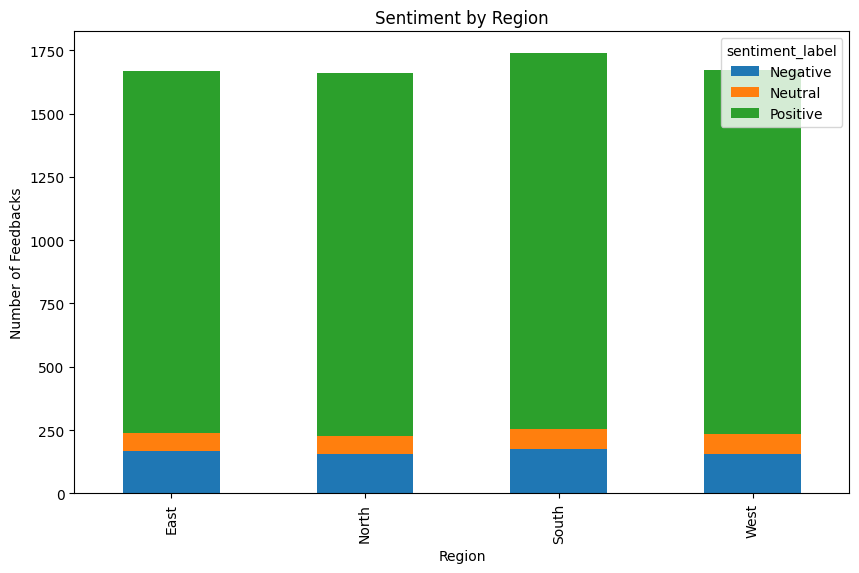

In [25]:
#For Region / State
sentiment_by_region = df.groupby(["Region", "sentiment_label"]).size().unstack().fillna(0)
sentiment_by_region.plot(kind="bar", stacked=True, figsize=(10,6))
plt.title("Sentiment by Region")
plt.ylabel("Number of Feedbacks")
plt.show()


In [26]:
sentiment_summary = df['sentiment_label'].value_counts(normalize=True) * 100
print(sentiment_summary)


sentiment_label
Positive    85.850037
Negative     9.665924
Neutral      4.484039
Name: proportion, dtype: float64


In [27]:
negative_feedback = df[df['sentiment_label'] == "Negative"]
negative_by_contract = negative_feedback['Contract'].value_counts()
print(negative_by_contract)


Contract
Month-to-month    390
Two year          143
One year          118
Name: count, dtype: int64


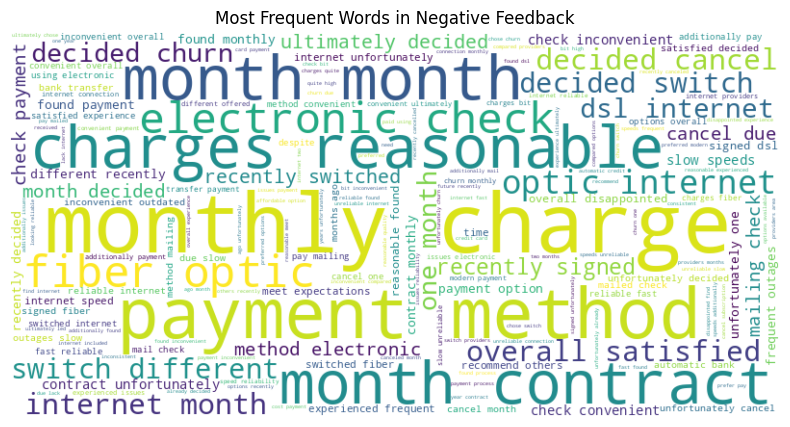

In [28]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# For negative feedback
text_neg = " ".join(negative_feedback["CleanedFeedback"].astype(str))
wc = WordCloud(width=800, height=400, background_color="white").generate(text_neg)

plt.figure(figsize=(10,5))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.title("Most Frequent Words in Negative Feedback")
plt.show()


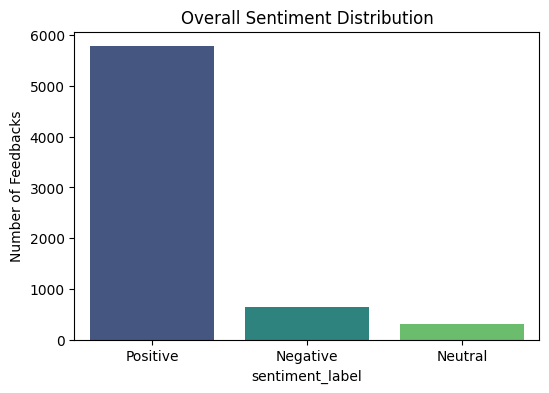

Sentiment % Distribution:
sentiment_label
Positive    85.850037
Negative     9.665924
Neutral      4.484039
Name: proportion, dtype: float64


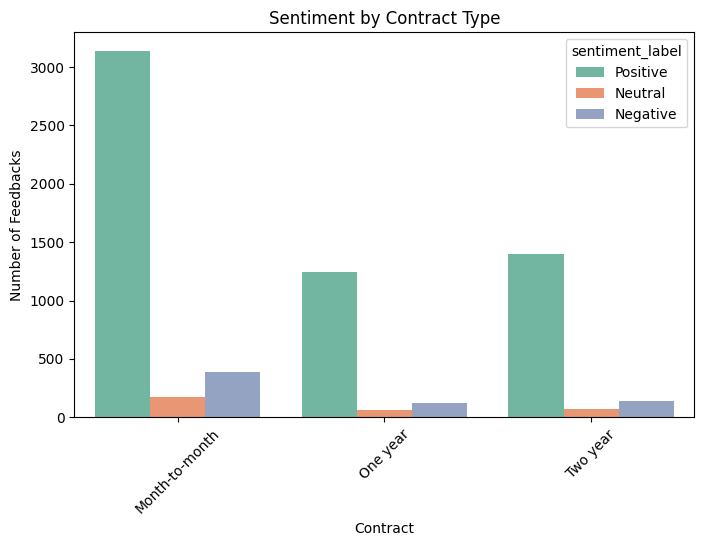

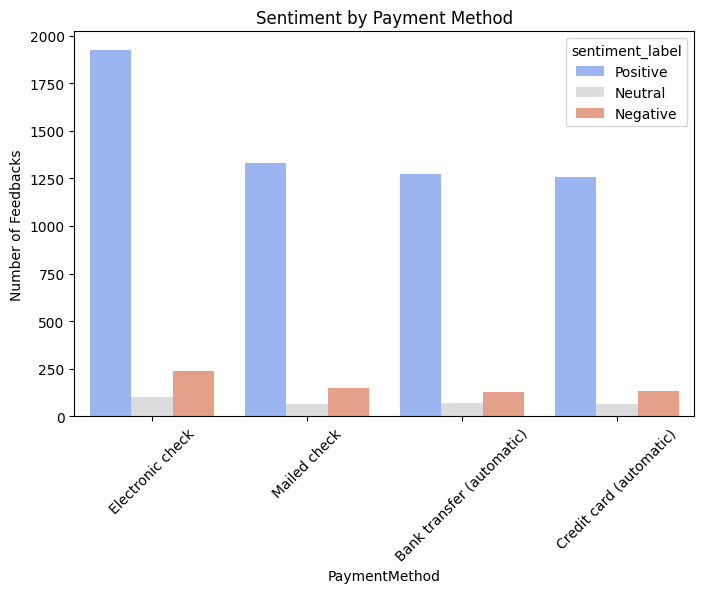

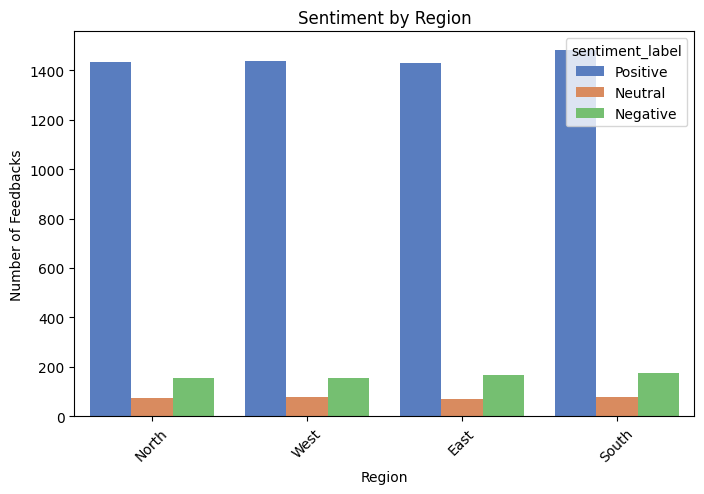

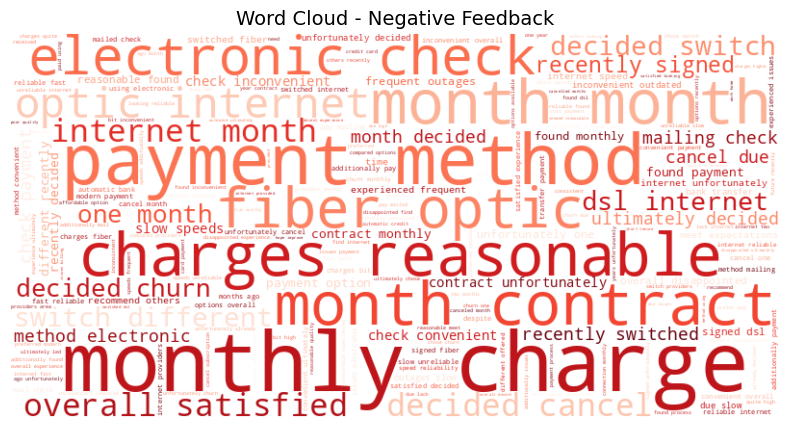

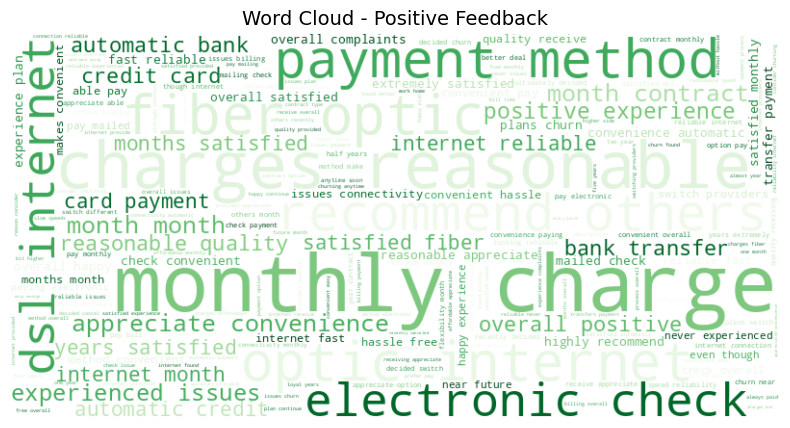

Negative Feedback by Contract:
 Contract
Month-to-month    390
Two year          143
One year          118
Name: count, dtype: int64

📊 Sentiment Prediction Model Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       145
           1       1.00      0.98      0.99        52
           2       1.00      1.00      1.00      1150

    accuracy                           1.00      1347
   macro avg       1.00      0.99      1.00      1347
weighted avg       1.00      1.00      1.00      1347



In [31]:
# 📌 Full Sentiment Analysis Workflow (Corrected & Safe)

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# ✅ 1. Sentiment Summary
if "sentiment_label" in df.columns:
    plt.figure(figsize=(6,4))
    sent_counts = df['sentiment_label'].value_counts()
    sns.barplot(x=sent_counts.index, y=sent_counts.values, palette="viridis")
    plt.title("Overall Sentiment Distribution")
    plt.ylabel("Number of Feedbacks")
    plt.show()

    print("Sentiment % Distribution:")
    print(df['sentiment_label'].value_counts(normalize=True) * 100)
else:
    print("⚠️ Column 'sentiment_label' not found in DataFrame")

# ✅ 2. Sentiment by Contract Type
if {"Contract","sentiment_label"}.issubset(df.columns):
    plt.figure(figsize=(8,5))
    sns.countplot(data=df, x="Contract", hue="sentiment_label", palette="Set2")
    plt.title("Sentiment by Contract Type")
    plt.ylabel("Number of Feedbacks")
    plt.xticks(rotation=45)
    plt.show()

# ✅ 3. Sentiment by Payment Method
if {"PaymentMethod","sentiment_label"}.issubset(df.columns):
    plt.figure(figsize=(8,5))
    sns.countplot(data=df, x="PaymentMethod", hue="sentiment_label", palette="coolwarm")
    plt.title("Sentiment by Payment Method")
    plt.ylabel("Number of Feedbacks")
    plt.xticks(rotation=45)
    plt.show()

# ✅ 4. Sentiment by Region
if {"Region","sentiment_label"}.issubset(df.columns):
    plt.figure(figsize=(8,5))
    sns.countplot(data=df, x="Region", hue="sentiment_label", palette="muted")
    plt.title("Sentiment by Region")
    plt.ylabel("Number of Feedbacks")
    plt.xticks(rotation=45)
    plt.show()

# ✅ 5. Word Clouds
if {"sentiment_label","CleanedFeedback"}.issubset(df.columns):
    # Negative Feedback WordCloud
    neg_text = " ".join(df[df['sentiment_label']=="Negative"]["CleanedFeedback"].astype(str))
    if neg_text.strip():
        wc_neg = WordCloud(width=800, height=400, background_color="white", colormap="Reds").generate(neg_text)
        plt.figure(figsize=(10,5))
        plt.imshow(wc_neg, interpolation="bilinear")
        plt.axis("off")
        plt.title("Word Cloud - Negative Feedback", fontsize=14)
        plt.show()
    else:
        print("⚠️ No negative feedbacks found")

    # Positive Feedback WordCloud
    pos_text = " ".join(df[df['sentiment_label']=="Positive"]["CleanedFeedback"].astype(str))
    if pos_text.strip():
        wc_pos = WordCloud(width=800, height=400, background_color="white", colormap="Greens").generate(pos_text)
        plt.figure(figsize=(10,5))
        plt.imshow(wc_pos, interpolation="bilinear")
        plt.axis("off")
        plt.title("Word Cloud - Positive Feedback", fontsize=14)
        plt.show()
    else:
        print("⚠️ No positive feedbacks found")

# ✅ 6. Key Drivers of Negative Feedback
if {"Contract","sentiment_label"}.issubset(df.columns):
    neg_contract = df[df['sentiment_label']=="Negative"]["Contract"].value_counts()
    print("Negative Feedback by Contract:\n", neg_contract)

# ✅ 7. Simple Predictive Model Setup
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

df_model = df.copy()

# Columns we expect to encode
cat_cols = ['gender','Dependents','PhoneService','MultipleLines','InternetService',
            'OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport',
            'StreamingTV','StreamingMovies','Contract','PaperlessBilling',
            'PaymentMethod','Region','State']

le = LabelEncoder()
for col in (cat_cols + ['sentiment_label']):
    if col in df_model.columns:
        df_model[col] = le.fit_transform(df_model[col].astype(str))

# ✅ Prepare X, y
X = df_model.drop(["CustomerFeedback","CleanedFeedback","sentiment_label"], axis=1, errors="ignore")
y = df_model["sentiment_label"] if "sentiment_label" in df_model.columns else None

# ✅ Drop ID-like columns (unique identifiers not useful for ML)
drop_cols = ["customerID", "CustomerID", "Customer_Id"]
for c in drop_cols:
    if c in X.columns:
        X = X.drop(c, axis=1)

# ✅ Encode any remaining string columns automatically
for col in X.columns:
    if X[col].dtype == "object":
        X[col] = le.fit_transform(X[col].astype(str))

# ✅ Train & Evaluate Model
if y is not None:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    model = RandomForestClassifier(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print("\n📊 Sentiment Prediction Model Report:")
    print(classification_report(y_test, y_pred))
else:
    print("⚠️ 'sentiment_label' not available for model training")


In [32]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import pandas as pd

# Drop only ID + text columns
drop_cols = ["customerID", "CustomerFeedback", "CleanedFeedback"]
df_ml = df_model.drop(columns=[c for c in drop_cols if c in df_model.columns], errors="ignore")

# Make sure target exists
if "sentiment_label" not in df_ml.columns:
    raise KeyError("⚠️ 'sentiment_label' column not found in df_model")

# Separate features & target
X = df_ml.drop("sentiment_label", axis=1)
y = df_ml["sentiment_label"]

# One-hot encode categorical features
X = pd.get_dummies(X, drop_first=True)

# Ensure all features numeric
X = X.apply(pd.to_numeric, errors="coerce").fillna(0)

print("✅ Feature matrix shape:", X.shape)

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("\n📊 Sentiment Prediction Model Report:")
print(classification_report(y_test, y_pred))


✅ Feature matrix shape: (6735, 52)

📊 Sentiment Prediction Model Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       145
           1       1.00      0.92      0.96        52
           2       1.00      1.00      1.00      1150

    accuracy                           1.00      1347
   macro avg       0.99      0.97      0.98      1347
weighted avg       1.00      1.00      1.00      1347



In [33]:
!pip install streamlit plotly wordcloud



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.0/10.0 MB 82.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 137.9 MB/s eta 0:00:00


In [54]:
%%writefile app.py
import streamlit as st

st.title("Hello Streamlit 🚀")
st.write("Your app is running on Colab using ngrok.")


Overwriting app.py


In [13]:
!ngrok config add-authtoken 31uIpxg5HWHWIMdOxqjxy0x07rW_mgYr3BR6du3LzfRY6cMu


Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


In [21]:
!pkill streamlit
from pyngrok import ngrok
ngrok.kill()

In [15]:
!pkill streamlit

In [22]:
!streamlit run app.py --server.port 8501 &>/dev/null &


In [17]:
from pyngrok import ngrok
ngrok.kill()   # kills old ngrok sessions


In [23]:
public_url = ngrok.connect(8501)
print("✅ Streamlit app is live at:", public_url)


✅ Streamlit app is live at: NgrokTunnel: "https://7f3a51e9f018.ngrok-free.app" -> "http://localhost:8501"


In [19]:
from pyngrok import ngrok

# Kill old tunnels
ngrok.kill()

# Start new tunnel
public_url = ngrok.connect(8501)
print("✅ Streamlit app is live at:", public_url)


ERROR:pyngrok.process.ngrok:t=2025-08-28T09:54:48+0000 lvl=eror msg="failed to reconnect session" obj=tunnels.session err="authentication failed: Your account is limited to 1 simultaneous ngrok agent sessions.\nYou can run multiple simultaneous tunnels from a single agent session by defining the tunnels in your agent configuration file and starting them with the command `ngrok start --all`.\nRead more about the agent configuration file: https://ngrok.com/docs/secure-tunnels/ngrok-agent/reference/config\nYou can view your current agent sessions in the dashboard:\nhttps://dashboard.ngrok.com/agents\r\n\r\nERR_NGROK_108\r\n"
ERROR:pyngrok.process.ngrok:t=2025-08-28T09:54:48+0000 lvl=eror msg="session closing" obj=tunnels.session err="authentication failed: Your account is limited to 1 simultaneous ngrok agent sessions.\nYou can run multiple simultaneous tunnels from a single agent session by defining the tunnels in your agent configuration file and starting them with the command `ngrok st

PyngrokNgrokError: The ngrok process errored on start: authentication failed: Your account is limited to 1 simultaneous ngrok agent sessions.\nYou can run multiple simultaneous tunnels from a single agent session by defining the tunnels in your agent configuration file and starting them with the command `ngrok start --all`.\nRead more about the agent configuration file: https://ngrok.com/docs/secure-tunnels/ngrok-agent/reference/config\nYou can view your current agent sessions in the dashboard:\nhttps://dashboard.ngrok.com/agents\r\n\r\nERR_NGROK_108\r\n.

In [69]:
!pip install streamlit pyngrok textblob matplotlib scikit-learn


In [24]:
!pip install streamlit pyngrok -q

from pyngrok import ngrok
import subprocess

# 🔑 Add your real ngrok authtoken (you already have it)
!ngrok config add-authtoken 31uIpxg5HWHWIMdOxqjxy0x07rW_mgYr3BR6du3LzfRY6cMu

# 🔹 Create the Streamlit app
app_code = """
import streamlit as st
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer

st.title("📊 Customer Feedback Sentiment Dashboard")

uploaded_file = st.file_uploader("Upload your CSV", type=["csv"])

if uploaded_file is not None:
    # Load full CSV
    df = pd.read_csv(uploaded_file, encoding="utf-8", on_bad_lines="skip")
    st.write(f"Loaded {df.shape[0]} rows and {df.shape[1]} columns")
    st.dataframe(df)  # Show full dataframe

    # ✅ Check if CustomerFeedback column exists
    if 'CustomerFeedback' not in df.columns:
        st.warning("⚠️ 'CustomerFeedback' column not found. Please check your CSV.")

    # ✅ Let user select which sentiment column to use
    sentiment_columns = [col for col in df.columns if col.lower() in ['sentiment_bert','sentiment_textblob','sentiment_vader']]
    if sentiment_columns:
        selected_sentiment = st.selectbox("Select sentiment column for analysis:", sentiment_columns)
        df["sentiment"] = df[selected_sentiment]  # unify column name to 'sentiment'
        st.success(f"Using '{selected_sentiment}' column for sentiment analysis ✅")

        # Sentiment Distribution Charts
        st.write("### Sentiment Distribution")
        sentiment_counts = df["sentiment"].value_counts()
        st.bar_chart(sentiment_counts)

        fig, ax = plt.subplots()
        ax.pie(sentiment_counts, labels=sentiment_counts.index, autopct="%1.1f%%")
        st.pyplot(fig)

        # Top pain points (negative feedback)
        st.write("### Top Pain Points (Negative Feedback)")
        if 'CustomerFeedback' in df.columns:
            negatives = df[df["sentiment"]=="Negative"]["CustomerFeedback"].dropna().astype(str)
            if not negatives.empty:
                vec = CountVectorizer(stop_words="english", max_features=10)
                bag = vec.fit_transform(negatives)
                top_words = pd.DataFrame({
                    "Word": vec.get_feature_names_out(),
                    "Count": bag.toarray().sum(axis=0)
                })
                st.bar_chart(top_words.set_index("Word"))
            else:
                st.write("No negative feedback found ✅")

            # Positive themes
            st.write("### Positive Themes")
            positives = df[df["sentiment"]=="Positive"]["CustomerFeedback"].dropna().astype(str)
            if not positives.empty:
                vec = CountVectorizer(stop_words="english", max_features=10)
                bag = vec.fit_transform(positives)
                top_words = pd.DataFrame({
                    "Word": vec.get_feature_names_out(),
                    "Count": bag.toarray().sum(axis=0)
                })
                st.bar_chart(top_words.set_index("Word"))
            else:
                st.write("No positive feedback found ✅")
        else:
            st.warning("⚠️ 'CustomerFeedback' column not detected for text analysis.")
    else:
        st.error("❌ No sentiment columns (sentiment_bert, sentiment_textblob, sentiment_vader) found in CSV.")



"""

# 👉 Save into app.py
with open("app.py", "w") as f:
    f.write(app_code)

# 🔹 Run Streamlit on port 8501
port = 8501
public_url = ngrok.connect(port)
print("✅ Streamlit app is live at:", public_url)

# 🔹 Launch Streamlit in background
process = subprocess.Popen(["streamlit", "run", "app.py", "--server.port", str(port)])


Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml
✅ Streamlit app is live at: NgrokTunnel: "https://050962f05a60.ngrok-free.app" -> "http://localhost:8501"


In [ ]:
!streamlit run app.py & npx localtunnel --port 8501





⠙⠹⠸⠼⠴
  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8502
  Network URL: http://172.28.0.12:8502
  External URL: http://34.125.172.90:8502

⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏Need to install the following packages:
localtunnel@2.0.2
Ok to proceed? (y) y

⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏your url is: https://poor-tires-travel.loca.lt


In [ ]:
|from pyngrok import ngrok, conf

# Paste your token here
!ngrok config add-authtoken YOUR_AUTHTOKEN


In [ ]:
import streamlit as st
import pandas as pd
import plotly.express as px
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv("customer_feedback_processed.csv")

# Sidebar filters
st.sidebar.header("Filters")
region = st.sidebar.selectbox("Select Region", df["Region"].unique())
service = st.sidebar.selectbox("Select Service Type", df["InternetService"].unique())

# Filtered dataframe
filtered_df = df[(df["Region"] == region) & (df["InternetService"] == service)]

# Sentiment Pie Chart
sentiment_counts = filtered_df["sentiment_label"].value_counts(normalize=True) * 100
fig = px.pie(values=sentiment_counts.values, names=sentiment_counts.index,
             title="Sentiment Distribution")
st.plotly_chart(fig)

# Negative Sentiment by Contract
negatives = filtered_df[filtered_df["sentiment_label"] == "Negative"]
neg_contract = negatives["Contract"].value_counts()
fig2 = px.bar(x=neg_contract.index, y=neg_contract.values,
              labels={"x": "Contract Type", "y": "Count"},
              title="Negative Feedback by Contract")
st.plotly_chart(fig2)

# Wordcloud
text = " ".join(filtered_df["CleanedFeedback"].astype(str))
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(text)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
st.pyplot(plt)

# Show some feedback examples
st.subheader("Sample Feedback")
st.write(filtered_df[["customerID", "CleanedFeedback", "sentiment_label"]].head(10))
